# Boston Analysis by Abolfazl Vakily

In [1]:
from sklearn.datasets import load_boston
import pandas as pd

### دیتاست بستون را وارد کنید

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

### توضیحاتی درباره این دیتاست

In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
x = boston.data
y = boston.target

In [7]:
df = pd.DataFrame(x, columns=boston.feature_names)
df ['Price'] = y

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### اثر گذارترین متغییر ها کدامند؟

In [9]:
from sklearn.linear_model import Lasso

In [10]:
model = Lasso(alpha=0.1 , normalize=True)

In [11]:
model.fit(x , y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
model.intercept_

13.957553329045094

In [13]:
model.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.95469429, -0.        ,  0.        , -0.        , -0.        ,
       -0.24795828,  0.        , -0.42817442])

### پیش بینی

In [14]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
Y = df['Price']

In [15]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
print(lm.intercept_)

31.682148582134047


In [19]:
coeff=pd.DataFrame(lm.coef_, boston.feature_names, columns=['Coefficient'])
coeff

,Coefficient
CRIM,-0.132774
ZN,0.035781
INDUS,0.049945
CHAS,3.121277
NOX,-15.469846
RM,4.048727
AGE,-0.010752
DIS,-1.386998
RAD,0.242354
TAX,-0.008691


In [20]:
predictions= lm.predict(X_test)

### محاسبه خطای معادله

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [22]:
print('Mean_Absolute_Error : ' , mean_absolute_error(y_test,predictions))
print('Mean_Squared_Error : ' , mean_squared_error(y_test,predictions))
print('Root_Mean_Squared_Error : ', np.sqrt(mean_squared_error(y_test,predictions)))

Mean_Absolute_Error :  3.1656052314924916
Mean_Squared_Error :  21.540218943931645
Root_Mean_Squared_Error :  4.6411441416887325


In [23]:
with pd.option_context("max.rows", 10):
    print(pd.DataFrame({'price':y_test, 'pre_price':predictions}))

     price  pre_price
173   23.6  28.655072
274   32.4  36.502090
491   13.6  15.418775
72    22.8  25.412343
452   16.1  18.845041
..     ...        ...
441   17.1  17.392941
23    14.5  13.382142
225   50.0  39.971443
433   14.3  16.630019
447   12.6  18.279526

[152 rows x 2 columns]


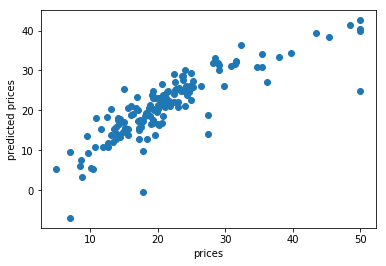

In [33]:
import matplotlib.pyplot as plt

plt.scatter(y_test,predictions)
plt.plot()
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.show()

### همون طور که در بالا دیدید گفتیم بیشترین تاثیر مربوط به
### "RM", "LSTAT", "PTRATIO"
### هست. در ادامه اومدم یادگیری رو روی همین سه تای بالا تنظیم کردم

In [24]:
X = df.loc[:,(df.columns != 'Price')]  
Y = df.Price

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [26]:
columns = ["RM", "LSTAT", "PTRATIO"]
model = LinearRegression()
model.fit(X_train[columns], Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
Y_pred = model.predict(X_test[columns])

In [28]:
Y_pred

array([26.92298627, 30.93686434, 16.47934188, 25.25409179, 18.28052198,
       22.71776451, 17.48030837, 12.67868396, 20.65299142, 19.72674849,
       19.62053908, 21.39117368, -1.63888554, 22.28305258, 19.5334365 ,
       24.73953404, 17.1762308 ,  3.83959545, 39.02235903, 17.25781087,
       25.90189855, 27.47962656, 11.74316928, 23.53277967, 17.93698432,
       13.86981688, 22.65619649, 19.32774678, 18.15760126, 18.82706414,
       19.72132643, 25.49788496, 25.14274849, 18.4146037 , 14.50579644,
       21.30312278, 32.36532273, 20.91382657, 20.20888187, 24.82872147,
       12.74319123, 28.21994868, 39.52761971, 18.8078418 , 26.03183697,
       15.77223641, 14.27426728, 26.09480414, 18.29649761, 31.22324968,
       23.74269632, 33.559009  , 16.01682884, 25.67415581, 38.30791834,
       22.41596988, 18.34605716, 30.13739458, 24.81027677, 15.41857328,
       25.51195584, 32.09021934, 30.05047579, 17.23144792, 28.34222612,
       11.86980665, 19.1480674 , 25.75429805, 29.12514764, 15.79

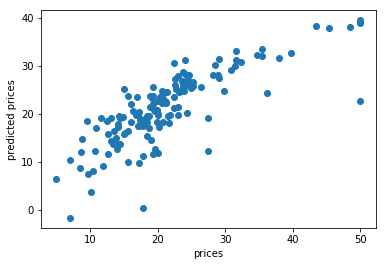

In [32]:
import matplotlib.pyplot as plt

plt.scatter(Y_test,Y_pred)
plt.plot()
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.show()

# محاسبه خطای معادله

### همونطور که در زیر می بینید خطا تغییر زیادی نکرده
### که همین نشون می ده که این سه متغییر، مهم ترین و بیشترین تاثیر رو دارند

In [30]:
print('Mean_Absolute_Error : ' , mean_absolute_error(Y_test,Y_pred))
print('Mean_Squared_Error : ' , mean_squared_error(Y_test, Y_pred))
print('Root_Mean_Squared_Error : ', np.sqrt(mean_squared_error(Y_test, Y_pred)))

Mean_Absolute_Error :  3.5911786565829567
Mean_Squared_Error :  26.012211922126255
Root_Mean_Squared_Error :  5.100216850500208


In [31]:
pd.DataFrame({'A':Y_test, 'B':Y_pred})

,A,B
173,23.6,26.922986
274,32.4,30.936864
491,13.6,16.479342
72,22.8,25.254092
452,16.1,18.280522
76,20.0,22.717765
316,17.8,17.480308
140,14.0,12.678684
471,19.6,20.652991
500,16.8,19.726748
